### [QE.1] Extra points (15 Points) Repeat the experiments Q2.1 to Q2.4, but now use the Gini criterion for node splitting, instead of the Information Gain criterion.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [23]:
dataset = pd.read_csv('data/house_votes_84.csv')

In [25]:
partitions = dataset.drop('target', axis=1)
labels = dataset['target']
features_train, features_test, labels_train, labels_test = train_test_split(
  partitions,labels , test_size=0.2, shuffle=True)

In [26]:
class DT_gini:
    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def gini(self, labels):
        label, counts = np.unique(labels, return_counts=True)
        return 1-np.sum((counts / counts.sum())**2)

    def gini_impurity(self, labels, partitions):
        values, counts = np.unique(partitions, return_counts=True)
        return sum((counts[i] / sum(counts)) * self.gini(labels[partitions == value]) for i, value in enumerate(values))

    def best_split(self, features, labels):
        best_gini = np.inf
        best_feature = None
        for feature in features.columns:
            avg_gini = self.gini_impurity(labels, features[feature])
            if avg_gini < best_gini:
                best_gini, best_feature = avg_gini, feature
        return best_feature


    def build_dt(self, features, labels, depth=0):
        if len(np.unique(labels)) == 1 or len(features) < self.min_samples_leaf or (self.max_depth and depth == self.max_depth):
            return np.unique(labels)[0]
        else:
            best_feature = self.best_split(features, labels)
            if best_feature is None:
                return np.unique(labels)[np.argmax(np.unique(labels, return_counts=True)[1])]
            tree = {best_feature: {}}
            for value in np.unique(features[best_feature]):
                sub_feature = features[features[best_feature] == value].drop([best_feature], axis=1)
                subtree = self.build_dt(sub_feature, labels[features[best_feature] == value], depth+1)
                tree[best_feature][value] = subtree
            return tree

    def fit(self, features, labels):
        self.tree = self.build_dt(features, labels)
        
    def predict(self, dataset):
        predictions = []
        for index, instance in dataset.iterrows():
            prediction = self.predict_helper(instance, self.tree)
            predictions.append(prediction)
        return np.array(predictions)
    
    def predict_helper(self, instance, tree):
        if not isinstance(tree, dict):
            return tree
        feature = next(iter(tree))
        if instance[feature] in tree[feature]:
            return self.predict_helper(instance, tree[feature][instance[feature]])
        else:
            return np.nan


In [27]:
training_accuracies = []
testing_accuracies = []
for _ in range(100):
    shuffle(dataset)
    partitions = dataset.drop('target', axis=1)
    labels = dataset['target']
    features_train, features_test, labels_train, labels_test = train_test_split(partitions,labels , test_size=0.2, shuffle=True)
    model = DT_gini()
    model.fit(features_train, labels_train)
    training_pred = model.predict(features_train)
    testing_pred =  model.predict(features_test)
    training_accuracy = np.sum(training_pred == labels_train)/len(labels_train)
    testing_accuracy = np.sum(testing_pred == labels_test)/len(labels_test)
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)


**Q2.1**

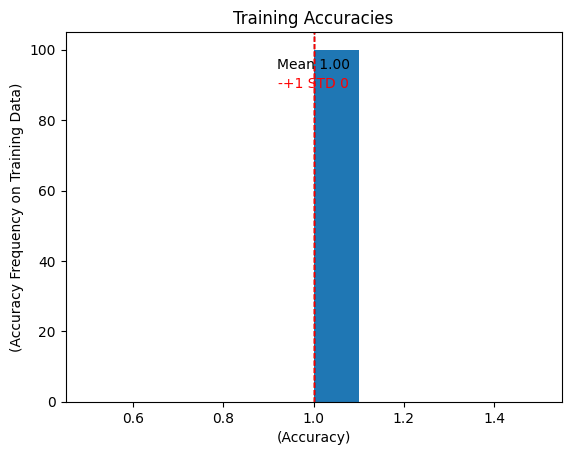

Average of training 1.0
Standard Deviation of training 0.0


In [28]:
plt.hist(training_accuracies, alpha=1)
plt.title('Training Accuracies')
plt.xlabel('(Accuracy)')
plt.ylabel('(Accuracy Frequency on Training Data)')
avg_training_accuracy = np.mean(training_accuracies)
std_training_accuracy = np.std(training_accuracies)
plt.axvline(avg_training_accuracy, color='k', linestyle='dashed', linewidth=1)
plt.axvline(avg_training_accuracy - std_training_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.axvline(avg_training_accuracy + std_training_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.text(avg_training_accuracy, plt.ylim()[1]*0.9, 'Mean {:.2f}'.format(avg_training_accuracy), horizontalalignment='center')
plt.text(avg_training_accuracy - std_training_accuracy, plt.ylim()[1]*0.85, '-+1 STD 0', horizontalalignment='center', color='red')
plt.show()
print(f'Average of training {avg_training_accuracy}')
print(f'Standard Deviation of training {std_training_accuracy}')

**Q2.2**

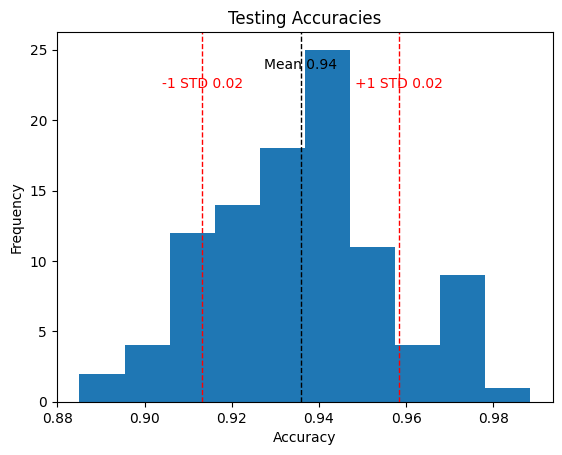

Average of testing 0.9358620689655173
Standard Deviation of testing 0.02259315210114569


In [29]:
plt.hist(testing_accuracies, alpha=1)
plt.title('Testing Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
avg_testing_accuracy = np.mean(testing_accuracies)
std_testing_accuracy = np.std(testing_accuracies)
plt.axvline(avg_testing_accuracy, color='k', linestyle='dashed', linewidth=1)
plt.axvline(avg_testing_accuracy - std_testing_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.axvline(avg_testing_accuracy + std_testing_accuracy, color='r', linestyle='dashed', linewidth=1)
plt.text(avg_testing_accuracy, plt.ylim()[1]*0.9, 'Mean {:.2f}'.format(avg_testing_accuracy), horizontalalignment='center')
plt.text(avg_testing_accuracy - std_testing_accuracy, plt.ylim()[1]*0.85, '-1 STD {:.2f}'.format(std_testing_accuracy), horizontalalignment='center', color='red')
plt.text(avg_testing_accuracy + std_testing_accuracy, plt.ylim()[1]*0.85, '+1 STD {:.2f}'.format(std_testing_accuracy), horizontalalignment='center', color='red')
plt.show()
print(f'Average of testing {avg_testing_accuracy}')
print(f'Standard Deviation of testing {std_testing_accuracy}')

**Q2.3**

Let's start by noting some definitions: The Gini index is a measure of impurity in a set of data. It is calculated by summing the squared probabilities of each class. A lower Gini index indicates a more pure set of data. Gini index and information gain can be used interchangeably, but there are some cases where one may be preferred over the other. Gini index is typically preferred when the classes are balanced, while information gain is typically preferred when the classes are imbalanced.

In our case, there wasn't much of a change when we used info gain vs when we used  Gini index. We have the same interpretation of histograms almost and we can answer this question the same way we did before.

The histogram of the training dataset has an accuracy of 1 and a std deviation off 0 which is expected in the context of decision trees since our model was trained on this data, so for every instance it's an instance that has a path already in the tree that it will follow and make the correct prediction of the class. In other words, decision trees are capable of perfectly memorizing the training data, the model is able to capture the pattern without any error.

On the other hand, the histogram of the testing dataset has a high average accuracy around 0.93, which even though it's high is still lower than the one of the training dataset. This reduction in accuracy is due to the fact that we're actually making predictions this time, the model is encountering new unseen instances. The new instances may have different patterns which can lead to incorrect predictions. The stanfard deviation is aorund +- 0.02 which is higher than the 0 of the training but still small on the big scheme of things. This variability in the performance is normal since the model is generalizing so not all predicitons will be accurate. The model on average generalizes well to unseen data, this is shown with the high frequency in the middle around 0.93.



**Q2.4**

In our case here, if we compare the two histograms we would say that the decision trees algorithm when used in this dataset is performing reasonably well, but there is some slight overfitting (not impacting the model tho). The training accuracy is 1 even when we run the code 100 times, which shows that the model is capable of perfectly memorizing the training data as mentioned earlier. We also saw that it generalizes well to new instances with an average testing accuracy of 0.93, while it might be slightly overfitting, 0.93 is still a pretty high accuracy score so I'm not sure if it's really impacting performance and the small variance proves that it's actually not, but we have to mention that there is some slight overfitting due to perfect training accuracy.